<https://nlp.stanford.edu/IR-book/newslides.html>
    
<https://cs.stanford.edu/people/abisee/nn.pdf>
    
<https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/05_nn.pdf>

<https://ratsgo.github.io/machine%20learning/2017/05/18/naive/>



In [21]:
from random import randint
N = 100 # 100개의 점이 있고
D = list((randint(1,100),randint(1,100)) for _ in range(N)) # 1~100사이의 숫자 아무거나
C = list(0 if sum(d)>100 else 1 for d in D) # class
sample = (50, 50) # Query


(50, 50)

In [5]:
from math import sqrt
# rel(d,q) => sim(d,q), in VS
def euc(x1, x2):
    return sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

def cos(x1, x2):
    innerProduct = x1[0]*x2[0] + x1[1]*x2[1]
    return innerProduct/(euc(x1, (0,0))*euc(x2, (0,0)))


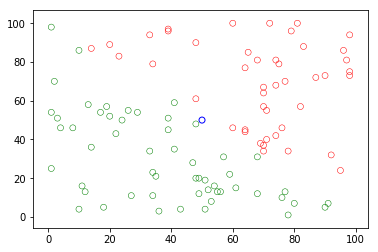

In [36]:
## EUC #################################################
import matplotlib.pyplot as plt

X = [d[0] for d in D]
Y = [d[1] for d in D]

similarity = [0.0 for _ in range(N)]
colorMap = ['r', 'g', 'b']
## Class 0: r, 1:g
#print(similarity)

for i in range(N):
    plt.scatter(X[i], Y[i], facecolor='none', edgecolors=colorMap[C[i]], linewidths=.5)
    similarity[i] = euc(D[i], sample)
    # similarity[i] = euc(D[i], sample) # EUC
    #similarity[i] = cos(D[i], sample) # COS
        
plt.scatter(sample[0], sample[1], facecolor='none',edgecolors=colorMap[-1]) # Query
plt.show()

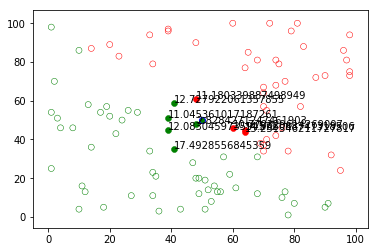

In [37]:
# # 근접한 9개를 찾아보자
K = 9 # sqrt(N), C = 짝수이면, K = 홀수
# sqrt(N). # C = 짝수면, K= 홀수로(서로 틀리게).
candidates = sorted(list(enumerate(similarity)), key = lambda x:x[1])[:K]
candidateKeys = [c[0] for c in candidates]
candidatesClass = list(0 for _ in range(2))

for i in range(N):
    plt.scatter(X[i], Y[i], facecolor=colorMap[C[i]] if i in candidateKeys else 'none', edgecolors=colorMap[C[i]], linewidths=.5)
    if i in candidateKeys:
        plt.text(X[i], Y[i], candidates[candidateKeys.index(i)][1])
        
plt.scatter(sample[0], sample[1], facecolor='r' if candidatesClass[0] > candidatesClass[1] else 'g',edgecolors=colorMap[-1])
plt.show()


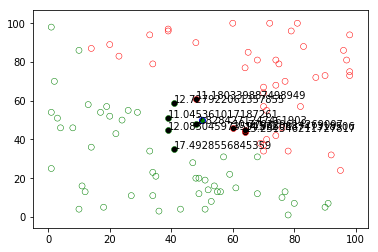

In [41]:
# EUC 유클리드
## candidates = list() # 인덱스
## print(similarity)
## [(i, s) for i, s in zip(range(N), similarity)]
## list(enumerate(similarity))

candidates = sorted(list(enumerate(similarity)), key=lambda x:x[1])[:K]
candidateKeys = [c[0] for c in candidates]
candidateClass = list(0 for _ in range(2))

for i in candidateKeys:
    candidateClass[C[i]] += 1

for i in range(N):
     plt.scatter(X[i], Y[i], facecolor= "k" if i in candidateKeys else "none", edgecolors=colorMap[C[i]], linewidths=.5)
     if i in candidateKeys:
         plt.text(X[i], Y[i], candidates[candidateKeys.index(i)][1])

plt.scatter(sample[0], sample[1], facecolor="r" if candidateClass[0] > candidateClass[1] else "g", edgecolors=colorMap[-1]) # Query
plt.show()

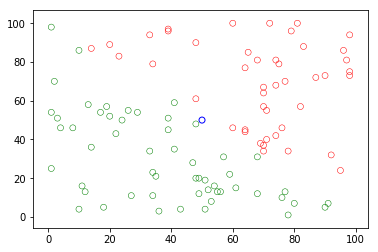

In [42]:
## COS ####################################################

import matplotlib.pyplot as plt

X = [d[0] for d in D]
Y = [d[1] for d in D]

similarity = [0.0 for _ in range(N)]
colorMap = ['r', 'g', 'b']
## Class 0: r, 1:g
#print(similarity)

for i in range(N):
    plt.scatter(X[i], Y[i], facecolor='none', edgecolors=colorMap[C[i]], linewidths=.5)
    similarity[i] = cos(D[i], sample) # COS
        
plt.scatter(sample[0], sample[1], facecolor='none',edgecolors=colorMap[-1]) # Query
plt.show()

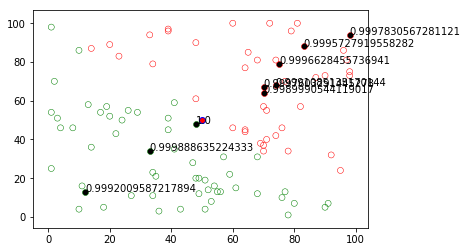

In [44]:
## COS 코사인거리
candidates = sorted(list(enumerate(similarity)), reverse=True, key=lambda x:x[1])[:K]
candidateKeys = [c[0] for c in candidates]
candidateClass = list(0 for _ in range(2))

for i in candidateKeys:
    candidateClass[C[i]] += 1

for i in range(N):
    plt.scatter(X[i], Y[i],
                facecolor= "k" if i in candidateKeys else "none",
                edgecolors=colorMap[C[i]], linewidths=.5)
    if i in candidateKeys:
        plt.text(X[i], Y[i], candidates[candidateKeys.index(i)][1])

plt.scatter(sample[0], sample[1],
            facecolor="r" if candidateClass[0] > candidateClass[1] else "g",
            edgecolors=colorMap[-1]) # Query

plt.show()

# kNN

## (1)

rel(d,q) = sim(d,q) = 1.distance(거리), 2.angle(각도)
k개의 relevant document 찾기

## (2)

Cj/k = P(j)
가장 높은 값을 갖는 j번째 클래스로 할당(분류)